In [4]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import numpy as np

In [5]:
vocab_size = 10000
(X_train, y_train),(X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
print(X_train[:5])
#print(X_train.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [7]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

X_train shape :  (25000, 200)
X_test shape :  (25000, 200)


In [8]:
print(y_train[:5])

[1 0 0 1 0]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPool1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

import os

embedding_dim = 256
dropout_ratio = 0.3
kernel_size = 3
num_filters = 256
hidden_units = 128

In [10]:
#모델 최적화 설정
MODEL_DIR = 'models/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

model_path = "models/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',mode = 'max', verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',verbose=1, mode = 'min', patience=3)

In [8]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))

model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test), callbacks = [early_stopping_callback,checkpointer])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.3979 - accuracy: 0.8049
Epoch 1: val_loss improved from -inf to 0.28856, saving model to models/01-0.2886.keras
782/782 [==============================] - 52s 56ms/step - loss: 0.3979 - accuracy: 0.8049 - val_loss: 0.2886 - val_accuracy: 0.8774
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2045 - accuracy: 0.9200
Epoch 2: val_loss improved from 0.28856 to 0.30091, saving model to models/02-0.3009.keras
782/782 [==============================] - 11s 14ms/step - loss: 0.2045 - accuracy: 0.9200 - val_loss: 0.3009 - val_accuracy: 0.8784
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9673
Epoch 3: val_loss improved from 0.30091 to 0.31939, saving model to models/03-0.3194.keras
782/782 [==============================] - 9s 11ms/step - loss: 0.0928 - accuracy: 0.9673 - val_loss: 0.3194 - val_accuracy: 0.8873
Epoch 4/20
782/782 [========================

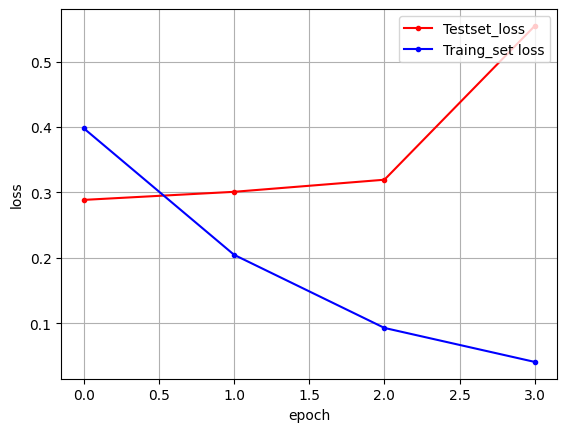

In [10]:
#테스트셋의 오차
y_vloss = history.history['val_loss'] #validation_data의 오차
y_loss = history.history['loss'] #트레인 셋의 오차

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', color='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', color = 'blue', label = 'Traing_set loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel("epoch")
plt.ylabel('loss')
plt.show()

# Pytorch Version
- dataset을 만들고, dataloader를 만든다.
- model을 선언할 때 __init__부분에는 초기화를 하고, forward를 통해서 전진화를 만든다.
- loss funtion, optimizer, es,mc을 초기화한다
- 모델을 돌릴 때에는 run epoch을 통해서 돌리고 loss function을 통해서 모델을 backward, optimizer.step을 한다.

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [12]:
X_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.long)
y_test = torch.tensor(y_test,dtype=torch.float32)

#dataset 만들기
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test, y_test)

#dataloader 만들기
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [13]:
class ConvNet(nn.Module):
    def __init__ (self, vocab_size, embedding_dim, num_filters, kernel_size, hidden_units, dropout_ratio):
        super(ConvNet, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.dropout1 = nn.Dropout(dropout_ratio)

        self.conv1 = nn.Conv1d(embedding_dim,num_filters,kernel_size)
        self.global_max_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(num_filters,hidden_units)
        self.dropout2 = nn.Dropout(dropout_ratio)
        self.fc2 = nn.Linear(hidden_units, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.dropout1(x)
        x = x.permute(0,2,1)
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.global_max_pool(x)
        x = x.view(x.size(0),-1) #flatten
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return torch.sigmoid(x)

In [14]:
model = ConvNet(vocab_size, embedding_dim, num_filters, kernel_size, hidden_units, dropout_ratio)

#loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 3
best_val_loss = float('inf')
patience_counter = 0

In [15]:
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch).squeeze()
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            output = model(X_batch).squeeze()
            loss = criterion(output, y_batch)
            val_loss += loss.item()

    val_loss /= len(test_loader)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save the model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

Epoch 1/20, Train Loss: 0.4573, Val Loss: 0.3202
Epoch 2/20, Train Loss: 0.2904, Val Loss: 0.2896
Epoch 3/20, Train Loss: 0.2447, Val Loss: 0.2878
Epoch 4/20, Train Loss: 0.2072, Val Loss: 0.2915
Epoch 5/20, Train Loss: 0.1826, Val Loss: 0.3074
Epoch 6/20, Train Loss: 0.1625, Val Loss: 0.3101
Early stopping triggered


In [16]:
# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

ConvNet(
  (embedding): Embedding(10000, 256)
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv1): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (global_max_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)